In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [3]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

No we are going to use TopKCategoricalAccuracy as well while compiling our model

In [5]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3)])

In [6]:
batch_size = 128
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

Epoch 1/25
469/469 [==============================] - 17s 9ms/step - loss: 2.2241 - accuracy: 0.3927 - top_k_categorical_accuracy: 0.6941 - val_loss: 2.1149 - val_accuracy: 0.6229 - val_top_k_categorical_accuracy: 0.8625
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 1.7936 - accuracy: 0.6967 - top_k_categorical_accuracy: 0.9022 - val_loss: 1.2466 - val_accuracy: 0.7802 - val_top_k_categorical_accuracy: 0.9406
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.8249 - accuracy: 0.8152 - top_k_categorical_accuracy: 0.9532 - val_loss: 0.5462 - val_accuracy: 0.8604 - val_top_k_categorical_accuracy: 0.9661
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.4871 - accuracy: 0.8672 - top_k_categorical_accuracy: 0.9687 - val_loss: 0.4081 - val_accuracy: 0.8909 - val_top_k_categorical_accuracy: 0.9745
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.3980 - accuracy: 0.8875 - top_k_categorical

In [7]:
score = model.evaluate(x_test, y_test)
len(score)

313/313 [==============================] - 1s 3ms/step - loss: 0.1655 - accuracy: 0.9508 - top_k_categorical_accuracy: 0.9926


3

In [8]:
print(score)

[0.1655101627111435, 0.9508000016212463, 0.9926000237464905]


In [9]:
top_3_accuracy = score[2]*100
print(round(top_3_accuracy, 2))

99.26


Top n(3) accuracy over time is also available in our history, lets view.

In [10]:
history_dict = history.history
history_dict

{'accuracy': [0.3926999866962433,
  0.6966999769210815,
  0.8151833415031433,
  0.8671833276748657,
  0.8875166773796082,
  0.8980333209037781,
  0.9051333069801331,
  0.9103000164031982,
  0.9146000146865845,
  0.918233335018158,
  0.9217000007629395,
  0.9254000186920166,
  0.9289500117301941,
  0.9307500123977661,
  0.9330666661262512,
  0.9351333379745483,
  0.9370999932289124,
  0.93913334608078,
  0.9406999945640564,
  0.9430000185966492,
  0.944183349609375,
  0.945900022983551,
  0.9472666382789612,
  0.9491666555404663,
  0.9494500160217285],
 'loss': [2.224123001098633,
  1.793644905090332,
  0.8248563408851624,
  0.48705220222473145,
  0.3980349898338318,
  0.3559473752975464,
  0.32982078194618225,
  0.3109004497528076,
  0.2956528663635254,
  0.2826896607875824,
  0.2714262306690216,
  0.2607572078704834,
  0.2510455250740051,
  0.2420864701271057,
  0.2335917055606842,
  0.22579824924468994,
  0.2182687222957611,
  0.21137258410453796,
  0.20489658415317535,
  0.198953926

In [11]:
history_dict.get('val_top_k_categorical_accuracy')

[0.862500011920929,
 0.9405999779701233,
 0.9660999774932861,
 0.9745000004768372,
 0.9786999821662903,
 0.9811999797821045,
 0.982200026512146,
 0.9829999804496765,
 0.9846000075340271,
 0.9848999977111816,
 0.98580002784729,
 0.9868999719619751,
 0.9872999787330627,
 0.9879000186920166,
 0.9886000156402588,
 0.9891999959945679,
 0.9898999929428101,
 0.9904999732971191,
 0.9908000230789185,
 0.9911999702453613,
 0.9912999868392944,
 0.9914000034332275,
 0.991599977016449,
 0.9919999837875366,
 0.9926000237464905]

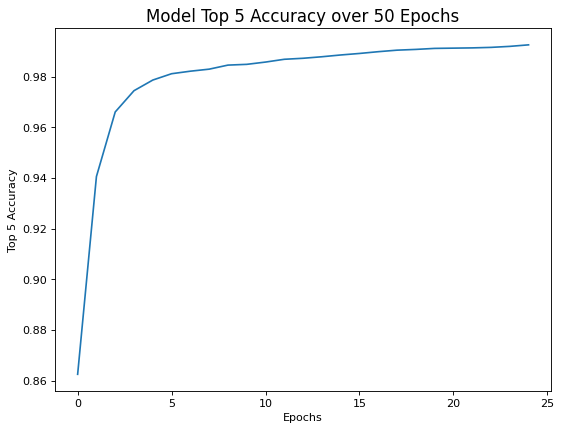

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.title('Model Top 5 Accuracy over 50 Epochs', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Top 5 Accuracy')
plt.plot(history_dict['val_top_k_categorical_accuracy'])